In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
stock = "HDFCBANK.NS"

In [3]:
stocks = yf.Ticker(stock)
hist = stocks.history(period="max")


In [4]:
fig = go.Figure(data=[
    go.Candlestick(
        x=hist.index,
        open=hist["Open"],
        high=hist["High"],
        low=hist["Low"],
        close=hist["Close"],
    )
])

fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    height=300,
    paper_bgcolor="LightSteelBlue",
    title=f"{stock} Stock Price",
)
fig.show()

In [5]:
stock = "HDFCBANK.NS"

stocks = yf.Ticker(stock)
hist = stocks.history(period="max")

hist['Date'] = hist.index.date

data_to_save = hist[['Date', 'Open', 'Close', 'Volume']]

data_to_save.to_csv(f"{stock}.csv", index=False)

print(f"Data saved as {stock}.csv")

Data saved as HDFCBANK.NS.csv


In [6]:
df = pd.read_csv("HDFCBANK.NS.csv")

In [7]:
df.head(5)

,Date,Open,Close,Volume
0,1996-01-01,2.402505,2.362860,350000
1,1996-01-02,2.362860,2.358896,412000
2,1996-01-03,2.358896,2.366825,284000
3,1996-01-04,2.366825,2.350967,282000
4,1996-01-05,2.350967,2.347002,189000


In [8]:
df.shape

(7001, 4)

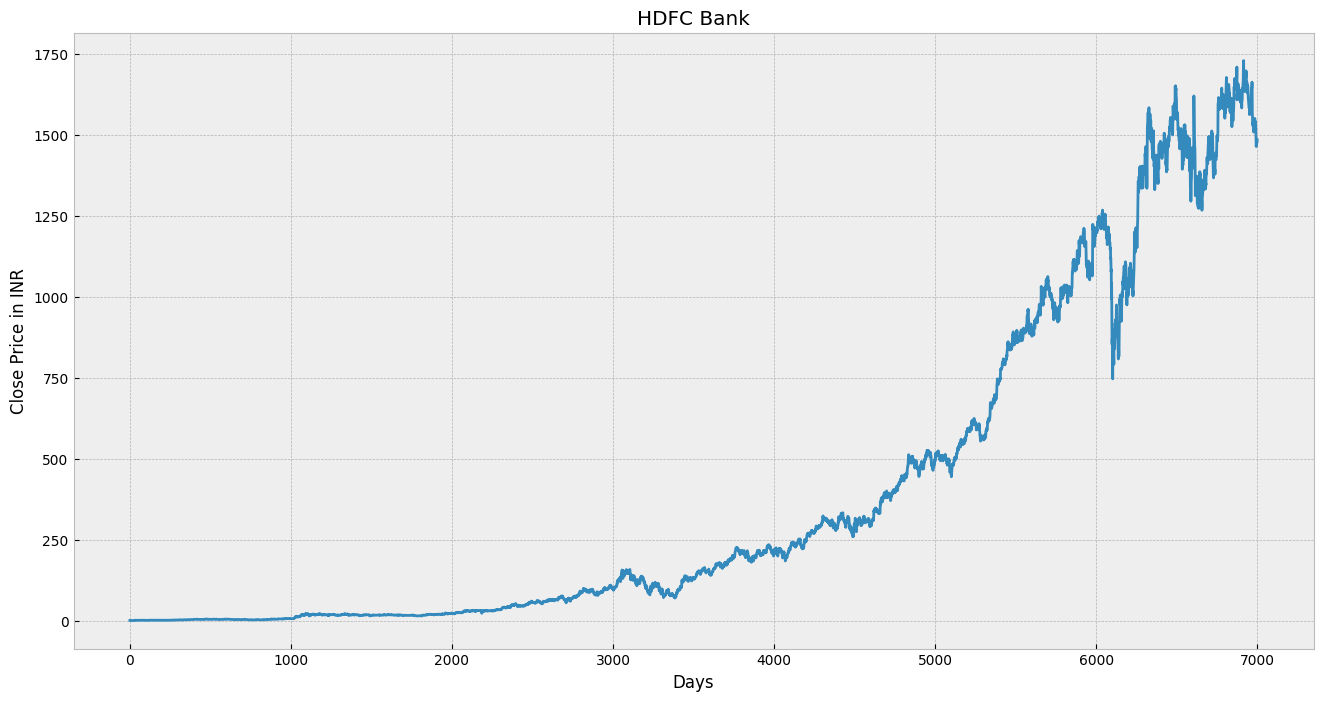

In [9]:
plt.figure(figsize=(16,8))
plt.title("HDFC Bank")
plt.xlabel("Days")
plt.ylabel("Close Price in INR")
plt.plot(df['Close'])
plt.show()


In [10]:
df = df[['Close']]
df.head(4)

,Close
0,2.362860
1,2.358896
2,2.366825
3,2.350967


In [11]:
future_days = 30
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
6997,1476.50,NaN
6998,1474.50,NaN
6999,1476.75,NaN
7000,1483.75,NaN


In [12]:
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[   2.3628602 ]
 [   2.35889578]
 [   2.36682463]
 ...
 [1661.75      ]
 [1629.05004883]
 [1563.69995117]]


<ipython-input-12-c9377b0fe6b5>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [13]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[   2.78310061    2.73552632    2.9416821  ... 1474.5        1476.75
 1483.75      ]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [15]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [16]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-16-2cacd72a4a59>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



array([[1649.90002441],
       [1650.5       ],
       [1635.84997559],
       [1618.80004883],
       [1610.90002441],
       [1606.19995117],
       [1597.30004883],
       [1590.75      ],
       [1589.5       ],
       [1582.69995117],
       [1586.59997559],
       [1579.30004883],
       [1561.5       ],
       [1577.75      ],
       [1590.30004883],
       [1578.69995117],
       [1571.44995117],
       [1574.69995117],
       [1584.55004883],
       [1574.90002441],
       [1595.5       ],
       [1610.84997559],
       [1623.40002441],
       [1631.80004883],
       [1636.90002441],
       [1643.90002441],
       [1642.90002441],
       [1661.75      ],
       [1629.05004883],
       [1563.69995117]])

In [17]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1491.11413574 1529.65002441 1531.         1537.65002441 1526.84997559
 1523.69995117 1526.30004883 1508.05004883 1529.55004883 1535.75
 1524.41821289 1627.83215332 1524.84997559 1539.59997559 1549.84997559
 1535.75       1529.59997559 1541.19995117 1519.75       1514.94995117
 1522.80004883 1573.57501221 1638.31201172 1463.40002441 1469.15002441
 1485.09997559 1476.5        1474.5        1476.75       1409.06982422]

[1664.64153289 1665.24534565 1650.50162627 1633.34265585 1625.39210643
 1620.66197363 1611.70515152 1605.11321152 1603.85521708 1597.0116782
 1600.93664542 1593.59003161 1575.67614167 1592.03006937 1604.66038266
 1592.986096   1585.68972826 1588.9605138  1598.87360825 1589.16186662
 1609.89359039 1625.34173751 1637.97205081 1646.425798   1651.55839074
 1658.60315959 1657.59676404 1676.56729559 1643.65821024 1577.89016275]


<ipython-input-18-063ff98a2772>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



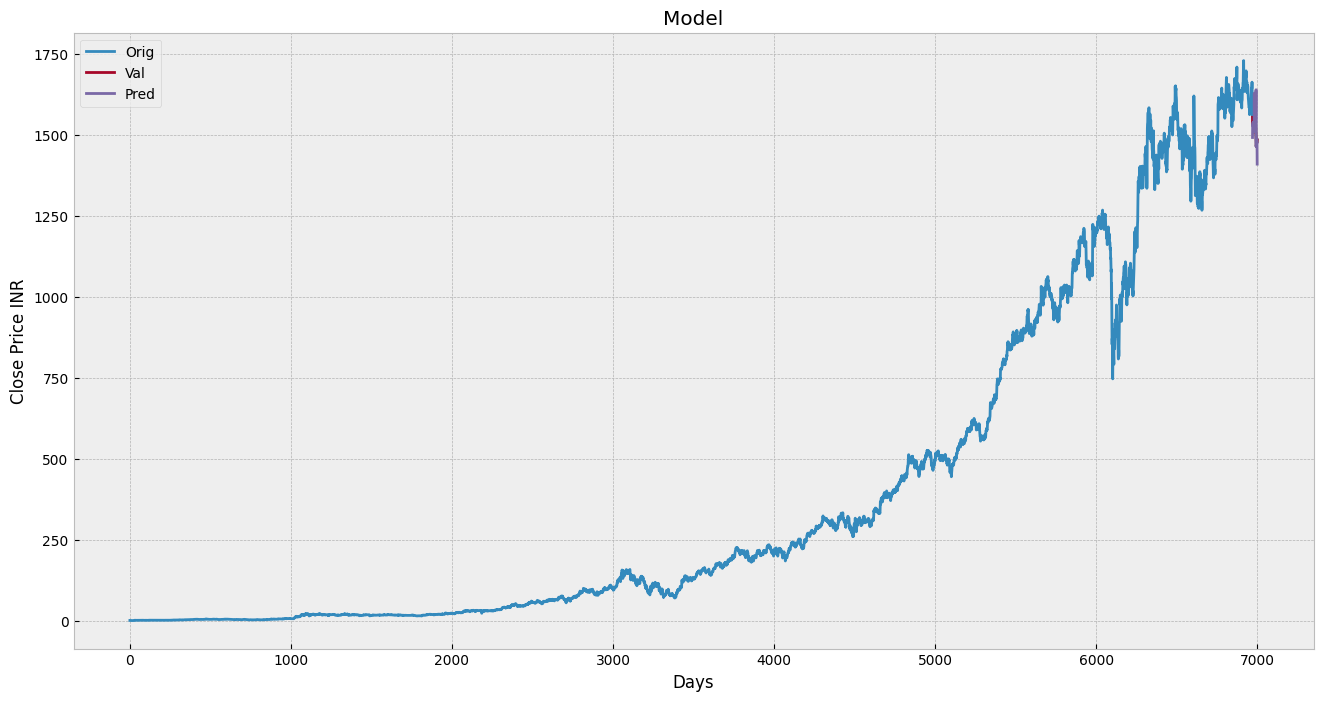

In [18]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()

In [19]:
pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21166 sha256=42864d501823fe6237c04e64a4e9e690b878e0d6364ff33a438124d77aba6e74
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [20]:
import mplcursors


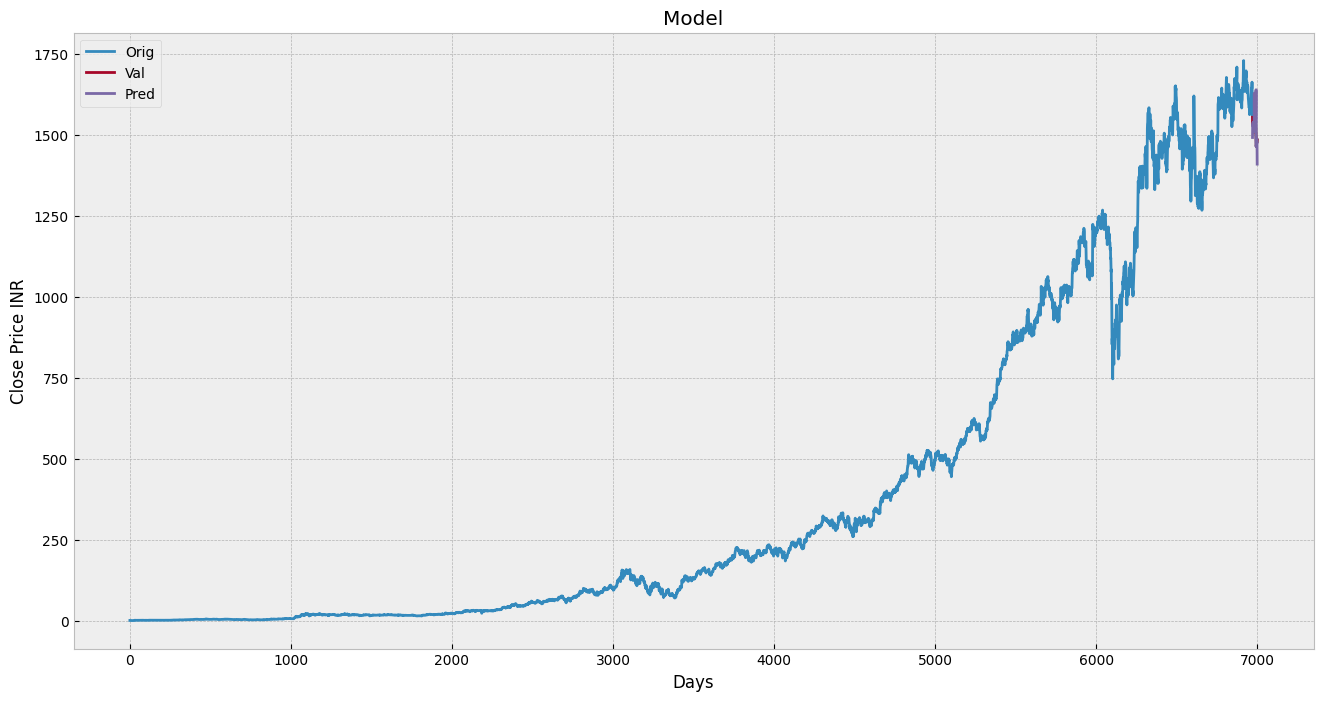

In [21]:
predictions = tree_prediction
valid = df[X.shape[0]:].copy()  
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f'Price: {sel.artist.get_data()[1]:.2f}'))

plt.show()

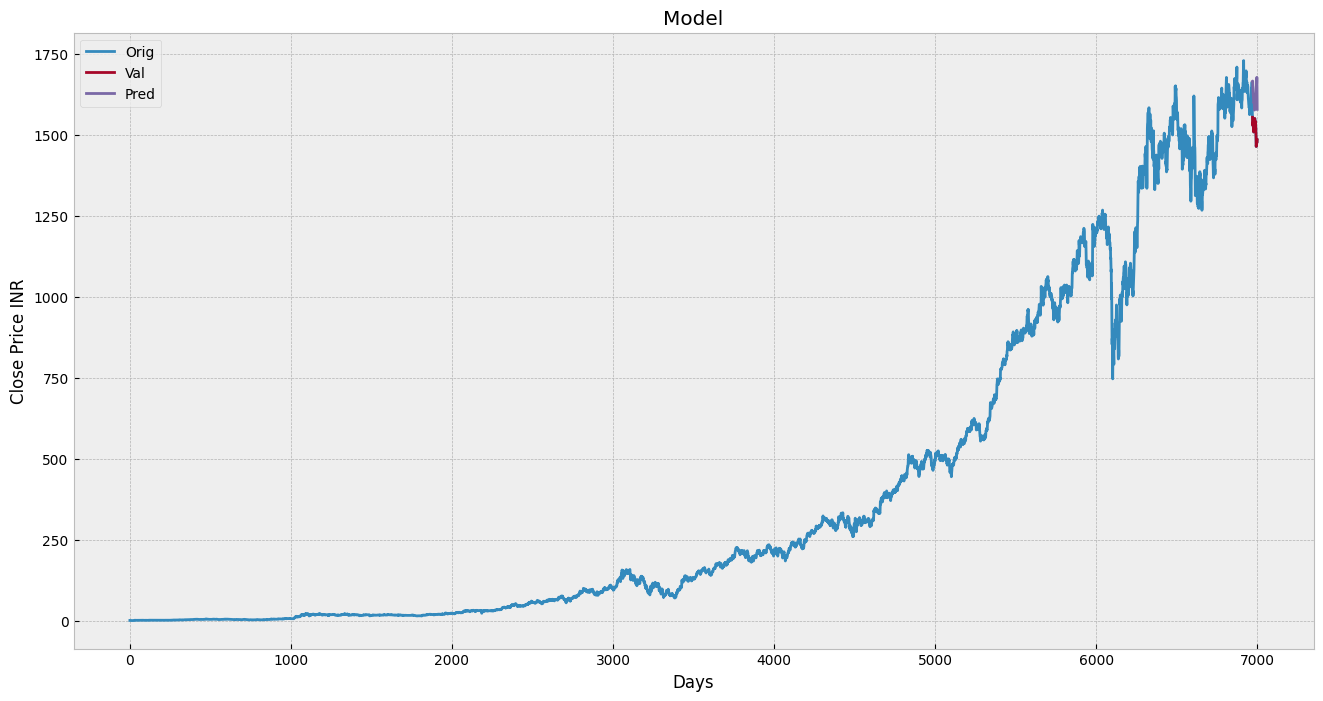

In [22]:
predictions = lr_prediction
valid = df[X.shape[0]:].copy()  
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f'Price: {sel.artist.get_data()[1]:.2f}'))

plt.show()

In [25]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train, y_train)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [1.00639555]
Intercept: 4.189489852245515


In [26]:
from sklearn.metrics import mean_squared_error


tree_predictions = tree.predict(x_test)
lr_predictions = lr.predict(x_test)

tree_mse = mean_squared_error(y_test, tree_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print("Decision Tree MSE:", tree_mse)
print("Linear Regression MSE:", lr_mse)


Decision Tree MSE: 3339.8241471834453
Linear Regression MSE: 2233.4943139706666


In [27]:
from sklearn.metrics import r2_score

tree_r2 = r2_score(y_test, tree_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Decision Tree R2:", tree_r2)
print("Linear Regression R2:", lr_r2)


Decision Tree R2: 0.9868086614344138
Linear Regression R2: 0.9911783440140867
